In [1]:
import os
import numpy as np

# Display
import matplotlib.pyplot as plt
%matplotlib inline

# Librosa 
import librosa
import librosa.display

import warnings
warnings.filterwarnings('ignore')

In [3]:
audio_file = 'classical.00064.wav'
audio_path = f'../../datasets/single_files/{audio_file}'
y, sr = librosa.load(audio_path)
size = len(y)

Text(0.5, 1.0, 'Spectrogram of classical.00064.wav')

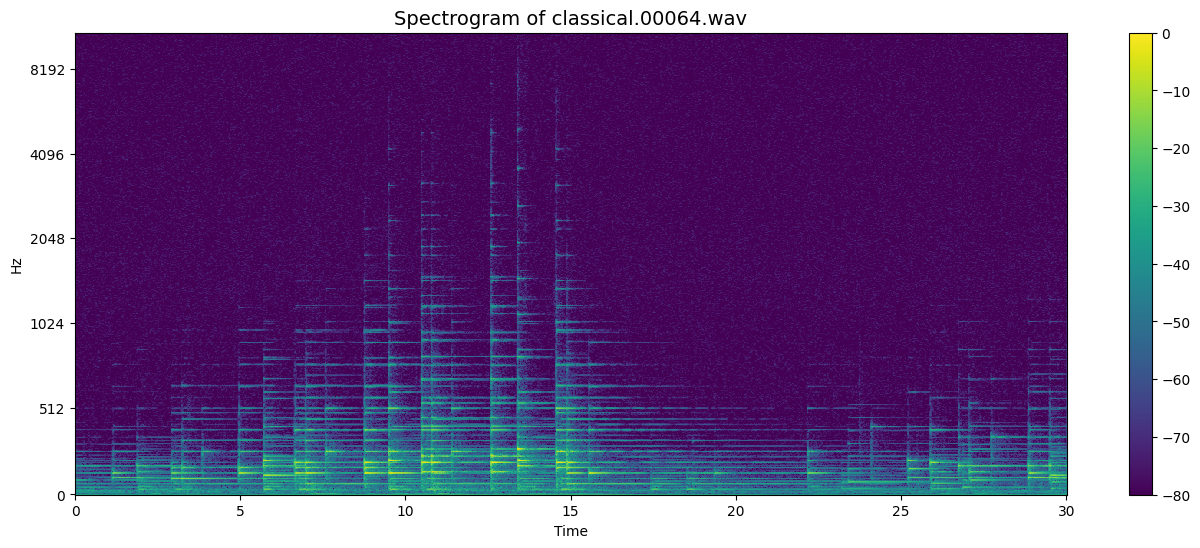

In [8]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(y, n_fft = n_fft, hop_length = hop_length))

# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'mel',
                        cmap = 'viridis')
plt.colorbar()
plt.title(f'Spectrogram of {audio_file}', fontsize=14)

In [24]:
DB

array([[-39.573746, -32.988438, -32.18037 , ..., -30.645987, -30.092154,
        -30.064741],
       [-42.67193 , -36.2535  , -37.98362 , ..., -36.9364  , -34.795723,
        -31.901766],
       [-56.63173 , -43.05467 , -42.296497, ..., -40.43275 , -36.669716,
        -37.236607],
       ...,
       [-74.9254  , -80.      , -80.      , ..., -80.      , -76.8125  ,
        -80.      ],
       [-75.725494, -80.      , -80.      , ..., -80.      , -80.      ,
        -74.339066],
       [-75.61665 , -79.42053 , -80.      , ..., -80.      , -80.      ,
        -74.660034]], dtype=float32)

Convert spectrogram from numpy array to tensor

In [26]:
import torch

tensor = torch.from_numpy(DB)

print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)


First row: tensor([-39.5737, -32.9884, -32.1804,  ..., -30.6460, -30.0922, -30.0647])
First column: tensor([-39.5737, -42.6719, -56.6317,  ..., -74.9254, -75.7255, -75.6167])
Last column: tensor([-30.0647, -31.9018, -37.2366,  ..., -80.0000, -74.3391, -74.6600])
tensor([[-39.5737,   0.0000, -32.1804,  ..., -30.6460, -30.0922, -30.0647],
        [-42.6719,   0.0000, -37.9836,  ..., -36.9364, -34.7957, -31.9018],
        [-56.6317,   0.0000, -42.2965,  ..., -40.4328, -36.6697, -37.2366],
        ...,
        [-74.9254,   0.0000, -80.0000,  ..., -80.0000, -76.8125, -80.0000],
        [-75.7255,   0.0000, -80.0000,  ..., -80.0000, -80.0000, -74.3391],
        [-75.6167,   0.0000, -80.0000,  ..., -80.0000, -80.0000, -74.6600]])


Audio Data Augmentation

In [9]:
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift
import numpy as np

augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
    TimeStretch(min_rate=0.8, max_rate=1.25, p=0.5),
    PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
    Shift(p=0.5),
])

# Augment/transform/perturb the audio data
augmented_samples = augment(samples=y, sample_rate=sr)